In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/rudal/OneDrive/Ai/abalone.csv", header=0, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

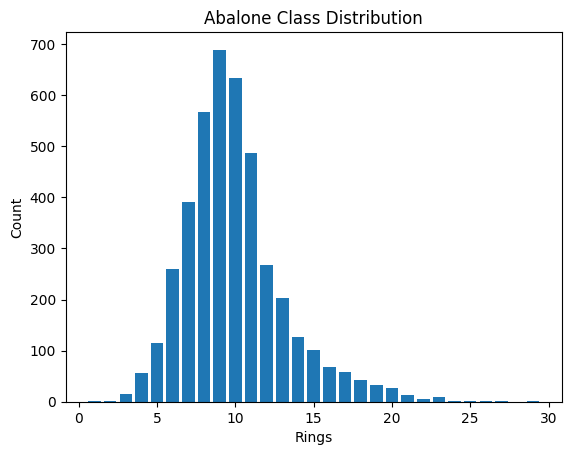

레이블 갯수: 28


In [4]:
# 클래스 갯수 확인
class_counts = df['Rings'].value_counts()

# 그래프로 시각화
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Abalone Class Distribution')
plt.show()

# 레이블 갯수 출력
print("레이블 갯수:", len(class_counts))

In [5]:
# 데이터 분리
X = df.drop('Rings', axis=1)
y = df['Rings']

In [6]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

In [7]:
# StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

In [9]:
# 입력 레이어 생성
inputs = Input(shape=(X_scaled.shape[1],))

# 은닉 레이어 생성
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(32, activation='relu')(hidden1)

# 출력 레이어 생성
outputs = Dense(1, activation='linear')(hidden2)

# 모델 생성
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error
# 딥러닝 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 딥러닝 모델 예측
dl_predictions = model.predict(X_test)

# 성능 평가
dl_rmse = mean_squared_error(y_test, dl_predictions, squared=False)

Epoch 1/50
84/84 [==============================] - 0s 2ms/step - loss: 3.9798 - val_loss: 4.5673
Epoch 2/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9882 - val_loss: 4.4721
Epoch 3/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9775 - val_loss: 4.4347
Epoch 4/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9097 - val_loss: 4.5213
Epoch 5/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9768 - val_loss: 4.3736
Epoch 6/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9765 - val_loss: 4.3979
Epoch 7/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9233 - val_loss: 4.3915
Epoch 8/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9519 - val_loss: 4.3846
Epoch 9/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9692 - val_loss: 4.4553
Epoch 10/50
84/84 [==============================] - 0s 1ms/step - loss: 3.9191 - val_loss: 4.4299
Epoch 11/50
84/84 [

C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
print("DL Regression RMSE:", dl_rmse)

DL Regression RMSE: 2.097507714308681
